# Plot the ARIMA predictions against actual values
plt.figure(figsize=(16,8))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(testing_data.index, testing_data.values)
plt.plot(testing_data.index, predictions_arima, color='red')
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.show()


# Installing and Importing Python Libraries

This notebook uses a variety of Python libraries. The code below will check if the necessary libraries are installed, import them if they are, or attempt to install them if they aren't. 

First, we'll need some built-in Python libraries to help us manage the modules. 

In [2]:
import importlib
import subprocess
import sys

def check_installed_and_import(import_dict):
    for module, import_as_tuple in import_dict.items():
        try:
            if len(import_as_tuple) == 3:   # Use "from x import y" syntax
                from_module, import_module, imported_as = import_as_tuple
                imported_module = importlib.import_module(from_module)
                globals()[imported_as] = getattr(imported_module, import_module)
            else:
                import_module, imported_as = import_as_tuple
                imported_module = importlib.import_module(import_module)
                globals()[imported_as] = imported_module
                
            print(f"{module} imported as {imported_as}")
        except Exception as e:
            print(f"FAILED: {module} imported as {imported_as}. Trying to install...")
            try:
                base_module = module.split(".")[0] 
                subprocess.check_call([sys.executable, '-m', 'pip', 'install', base_module])
                
                # Try import again after installation
                if len(import_as_tuple) == 3:
                    from_module, import_module, imported_as = import_as_tuple
                    imported_module = importlib.import_module(from_module)
                    globals()[imported_as] = getattr(imported_module, import_module)
                else:
                    import_module, imported_as = import_as_tuple
                    imported_module = importlib.import_module(import_module)
                    globals()[imported_as] = imported_module
                
                print(f"{module} imported as {imported_as}")
            except Exception as e:
                print(f"FAILED: {module} imported as {imported_as}. Error: {e}")

Next, we define the dictionary module_import_dict to specify the modules that are needed for the notebook, and the aliases we want to import them as.

In [3]:
module_import_dict = {
    'pandas': ('pandas', 'pd'),
    'numpy': ('numpy', 'np'),
    'matplotlib.pyplot': ('matplotlib', 'pyplot', 'plt'),
    'os': ('os', 'os'),
    'datetime': ('datetime', 'datetime'),
    'sklearn.metrics.mean_squared_error': ('sklearn.metrics', 'mean_squared_error', 'mean_squared_error'),
    'sklearn.preprocessing.MinMaxScaler': ('sklearn.preprocessing', 'MinMaxScaler', 'MinMaxScaler'),
    'tensorflow': ('tensorflow', 'tf'),
    'tensorflow.keras.models.Sequential': ('tensorflow.keras.models', 'Sequential', 'Sequential'),
    'tensorflow.keras.layers.Dense': ('tensorflow.keras.layers', 'Dense', 'Dense'),
    'tensorflow.keras.layers.Dropout': ('tensorflow.keras.layers', 'Dropout', 'Dropout'),
    'tensorflow.keras.layers.LSTM': ('tensorflow.keras.layers', 'LSTM', 'LSTM'),
    'alpha_vantage.timeseries': ('alpha_vantage.timeseries', 'TimeSeries', 'TimeSeries'),
    'math': ('math', 'math'),
    'statsmodels.tsa.arima.model': ('statsmodels.tsa.arima.model', 'ARIMA', 'ARIMA')
}

Finally, we call our function with the dictionary as an argument to install and import all the necessary modules.

In [4]:
check_installed_and_import(module_import_dict)

pandas imported as pd
numpy imported as np
matplotlib.pyplot imported as plt
os imported as os
datetime imported as datetime


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


sklearn.metrics.mean_squared_error imported as mean_squared_error
sklearn.preprocessing.MinMaxScaler imported as MinMaxScaler


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

tensorflow imported as tf
tensorflow.keras.models.Sequential imported as Sequential
tensorflow.keras.layers.Dense imported as Dense
tensorflow.keras.layers.Dropout imported as Dropout
tensorflow.keras.layers.LSTM imported as LSTM
FAILED: alpha_vantage.timeseries imported as TimeSeries. Trying to install...
alpha_vantage.timeseries imported as TimeSeries
math imported as math
statsmodels.tsa.arima.model imported as ARIMA


# Importing and Processing the Data

This section includes data collection, preprocessing, and splitting the data into training and testing datasets.  
  
We first import the API key for the Alpha Vantage service. Alpha Vantage provides APIs for various financial data, including stock prices.

In [5]:
# Import Alpha Vantage API key
with open('/kaggle/input/api-key/API_KEY.txt', 'r') as file:
    API_KEY = file.read().strip()

Next, we define the stock symbol for which we want to retrieve data, initialize the TimeSeries class, and get the daily time series data.

In [6]:
# Define the company to get stock data for
symbol = 'AAPL'

# Initialize the TimeSeries class with your key
ts = TimeSeries(key=API_KEY, output_format='pandas')

# Get the last 100 days of daily time series data in a pandas dataframe
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

We then reverse the data order, select the 'Close Price' for the prediction, and plot the data.

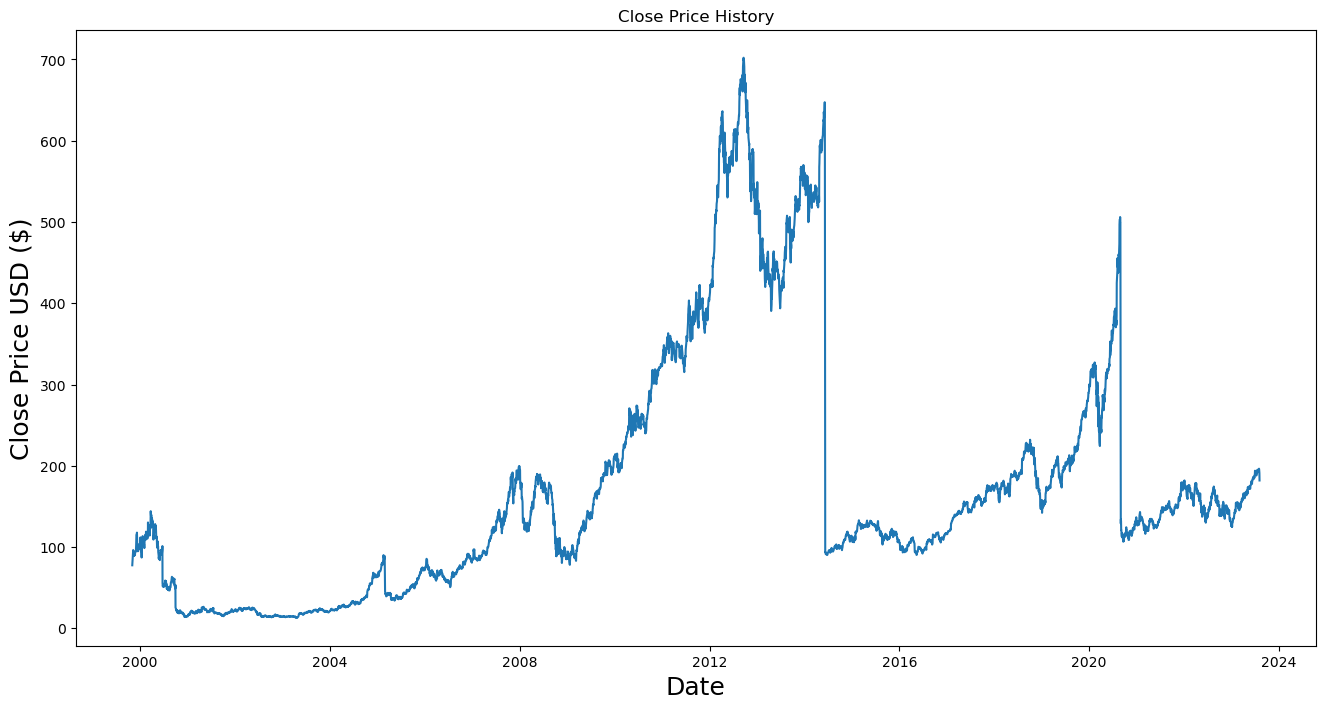

In [7]:
# Reverse the order of the dataframe (earliest to latest)
data = data.iloc[::-1]

# Use the adjusted close prices for the prediction
data = data[['4. close']]

# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['4. close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

The data is then split into training and testing datasets and scaled using MinMaxScaler.

In [8]:
# Split the data into train and test datasets
dataset = data.values
train_data_len = int(np.ceil( len(dataset) * .8 ))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Model Training
In this section, we will define and train our LSTM model.

First, we specify the number of GPUs and use the 'tf.distribute.MirroredStrategy' to distribute the model across multiple GPUs if available.

In [9]:
# Specify the number of GPUs
num_gpus = 2

# Use the 'tf.distribute.MirroredStrategy'
strategy = tf.distribute.MirroredStrategy()

Next, we define our model within the strategy's scope. The model is compiled with the 'mean_squared_error' loss function and the 'adam' optimizer.

In [10]:
with strategy.scope():
    # Define your model within the strategy's scope
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    # Compile the model within the strategy scope
    model.compile(loss='mean_squared_error', optimizer='adam')

Finally, we train the model with 100 epochs and a batch size of 32.

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
148/148 [==============================] - 16s 75ms/step - loss: 0.0045
Epoch 2/100
148/148 [==============================] - 11s 73ms/step - loss: 0.0018
Epoch 3/100
148/148 [==============================] - 11s 73ms/step - loss: 0.0014
Epoch 4/100
148/148 [==============================] - 11s 74ms/step - loss: 0.0013
Epoch 5/100
148/148 [==============================] - 11s 73ms/step - loss: 0.0012
Epoch 6/100
148/148 [==============================] - 11s 73ms/step - loss: 0.0011
Epoch 7/100
148/148 [==============================] - 11s 74ms/step - loss: 9.9881e-04
Epoch 8/100
148/148 [==============================] - 11s 72ms/step - loss: 0.0011
Epoch 9/100
148/148 [==============================] - 11s 72ms/step - loss: 9.0272e-04
Epoch 10/100
148/148 [==============================] - 11s 73ms/step - loss: 8.3172e-04
Epoch 11/100
148/148 [==============================] - 11s 74ms/step - loss: 0.0010
Epoch 12/100
148/148 [==============================] - 11s 72

# Testing and Visualizing Predictions with LSTM model

This section is dedicated to testing the LSTM model and visualizing the predictions.

First, we create a new array containing scaled values from index `train_data_len - 60` to the end of the `scaled_data`.


In [ ]:
# Create a new array containing scaled values from index 1543 to 2003 
test_data = scaled_data[train_data_len - 60: , : ]

Next, we create the test datasets `x_test` and `y_test`.

In [ ]:
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

Then, we predict the stock prices and inverse transform the predictions.

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

We create a DataFrame `valid` for the validation data and add the predictions to this DataFrame. We calculate the root mean squared error (RMSE) and visualize the predictions.

In [ ]:
# Create a DataFrame for the valid data
valid = data[train_data_len:].copy()  # Create a copy to avoid SettingWithCopyWarning

# Add the predictions to the valid DataFrame
valid.loc[:, 'Predictions'] = predictions

# Calculate root mean squared error
rmse = math.sqrt(mean_squared_error(valid['4. close'], valid['Predictions']))

print("The root mean squared error is {}.".format(rmse))

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['4. close']])
plt.plot(valid[['Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

# Training and Evaluating the ARIMA model
In this section, we train the ARIMA model, make predictions, evaluate the performance, and visualize the predictions.

First, we define the training and testing data for the ARIMA model and prepare for the predictions.

In [ ]:
# Train ARIMA model
# Use the original 'Close' values for this
training_data = data['4. close'][:train_data_len]
testing_data = data['4. close'][train_data_len:]

history = [x for x in training_data]
predictions_arima = list()

Then, we use the test data to make predictions with the ARIMA model, add the new test data to the history for the next prediction, and calculate the RMSE for the ARIMA model.

In [ ]:
# We use the same test data as for the LSTM
for t in range(len(testing_data)):
    model_arima = ARIMA(history, order=(5,1,0)) # adjust the parameters as needed
    model_arima_fit = model_arima.fit()
    output = model_arima_fit.forecast()
    predictions_arima.append(output[0])
    history.append(testing_data[t])

# Calculate RMSE for ARIMA
rmse_arima = math.sqrt(mean_squared_error(testing_data, predictions_arima))
print('The RMSE of the ARIMA model is {}.'.format(rmse_arima))


Finally, we visualize the ARIMA predictions.

In [ ]:
# Plot the ARIMA predictions against actual values
plt.figure(figsize=(16,8))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(testing_data.index, testing_data.values)
plt.plot(testing_data.index, predictions_arima, color='red')
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.show()


# Observations and Future Work

## Observations

In our exploration of predicting stock prices using both LSTM and ARIMA models, we have successfully set up the framework for the prediction pipeline. Our model fetches the data, preprocesses it, trains the models, makes predictions, evaluates the performance, and visualizes the predictions.

While the LSTM model is quite powerful for dealing with time-series data, its implementation requires more computing resources and effort to train, especially with a large amount of data. The ARIMA model, on the other hand, is simpler but may not capture complex patterns as effectively as the LSTM model.

It is worth noting that stock price prediction is inherently difficult due to the high volatility and numerous influencing factors, such as geopolitical events, company performance, and overall economic indicators. 

## Future Work

There are several potential improvements and avenues for future development:

1. **Feature Engineering:** The models could potentially be improved by engineering more features, such as technical indicators (moving averages, relative strength index, etc.) or by using other types of data like news sentiment.

2. **Model Tuning:** We can tune the hyperparameters of the models (like the order of the ARIMA model, the number of layers and units in LSTM) for better performance.

3. **Ensemble Methods:** Combining predictions from multiple models could lead to better performance than any single model.

4. **Incorporating Domain Knowledge:** If we have domain expertise, we can incorporate that knowledge into the model or the features to make better predictions.

5. **Model Evaluation:** It could be beneficial to include more robust evaluation metrics or compare our models' performance against benchmark models or naive prediction methods.

6. **Robust Error Handling:** Our script could be enhanced by more sophisticated error handling and testing, to ensure it behaves as expected in various circumstances.
